In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [133]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [134]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [135]:
df.drop(['day','month','year'],axis = 1,inplace=True)

In [136]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [137]:
df['Classes'].value_counts()

Classes
fire             126
not fire          93
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [138]:
## encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)
df.head()
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
225,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
226,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
227,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
228,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
229,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [139]:
## independ and dependent and featurs
x = df.drop('FWI',axis=1)
y = df['FWI'] ## ---- output feature

In [140]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [141]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [142]:
X_train.shape,X_test.shape

((172, 11), (58, 11))

In [143]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.692622,-0.374861,-0.340798,0.718189,0.519193,0.395826,0.628883,0.489027,0.514918,0.290783
RH,-0.692622,1.000000,0.302973,0.232287,-0.636700,-0.436399,-0.258395,-0.725242,-0.382398,-0.413788,-0.388256
Ws,-0.374861,0.302973,1.000000,0.309283,-0.299069,-0.082038,0.000865,-0.112734,-0.050261,-0.157318,-0.169850
Rain,-0.340798,0.232287,0.309283,1.000000,-0.530082,-0.259979,-0.273185,-0.315982,-0.271037,-0.363983,-0.104673
FFMC,0.718189,-0.636700,-0.299069,-0.530082,1.000000,0.604403,0.509715,0.733676,0.593660,0.764187,0.251342
DMC,0.519193,-0.436399,-0.082038,-0.259979,0.604403,1.000000,0.877736,0.667415,0.981630,0.573849,0.212289
DC,0.395826,-0.258395,0.000865,-0.273185,0.509715,0.877736,1.000000,0.482694,0.941010,0.491641,-0.066090
ISI,0.628883,-0.725242,-0.112734,-0.315982,0.733676,0.667415,0.482694,1.000000,0.627760,0.723837,0.302286
BUI,0.489027,-0.382398,-0.050261,-0.271037,0.593660,0.981630,0.941010,0.627760,1.000000,0.575051,0.105264
Classes,0.514918,-0.413788,-0.157318,-0.363983,0.764187,0.573849,0.491641,0.723837,0.575051,1.000000,0.172828


<Axes: >

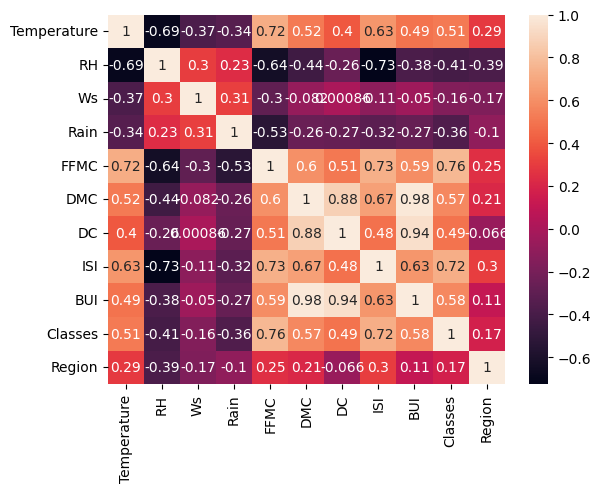

In [144]:
## check for multicolinearity
plt.Figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [115]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [145]:
## threshold - domain experties
corr_features = correlation(X_train,0.85)

In [146]:
corr_features

{'BUI', 'DC'}

In [147]:
## drop feature when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace= True)
X_train.shape,X_test.shape



((172, 9), (58, 9))

Feature scaling or standardization

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
X_train_scaled

array([[-0.05078828,  0.33589025, -0.63717349, ..., -0.86134479,
        -1.1107503 , -0.92166283],
       [-0.32377526,  0.0636965 , -0.26056236, ...,  0.23062124,
         0.90029235, -0.92166283],
       [-0.05078828,  0.40393869,  0.11604878, ...,  0.18314445,
         0.90029235, -0.92166283],
       ...,
       [-1.96169719,  0.88027775,  0.49265992, ..., -1.07499032,
        -1.1107503 , -0.92166283],
       [ 2.13310762, -2.18190192, -0.26056236, ...,  2.81810597,
         0.90029235,  1.08499548],
       [-0.59676225,  0.94832618,  1.99910446, ..., -0.86134479,
        -1.1107503 , -0.92166283]], shape=(172, 9))

Box Plots to understand effect of Standard scaler


In [ ]:
plt.
